In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes=True)

In [3]:
import warnings
warnings.simplefilter(action='ignore')

In [4]:
train_df = pd.read_csv("titanic/train.csv")

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print("Percentage of missing 'Age' records is %.2f%%" %((train_df['Age'].isnull().sum()/ train_df.shape[0])*100))

Percentage of missing 'Age' records is 19.87%


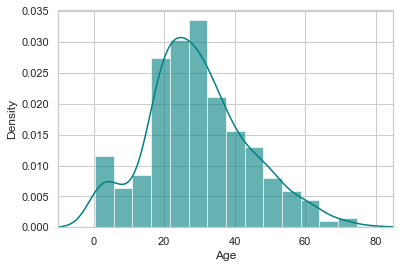

In [8]:
ax = train_df['Age'].hist(bins=15, density=True, color='teal', alpha = 0.6)
train_df['Age'].plot(kind='density', color='teal')
ax.set(xlabel = 'Age')
plt.xlim(-10, 85)
plt.show()

#### Since age is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this we will use median to impute the missing values.

In [9]:
print("The mean of 'Age' is %.2f" %(train_df["Age"].mean(skipna = True)))

The mean of 'Age' is 29.70


In [10]:
print("The median of 'Age' is %.2f" %(train_df["Age"].median(skipna = True)))

The median of 'Age' is 28.00


In [11]:
print("Percentage of missing 'Cabin' records is %.2f%%" %(train_df['Cabin'].isnull().sum()/train_df.shape[0]*100))

Percentage of missing 'Cabin' records is 77.10%


In [12]:
print("Percentage of missing 'Embarked' records is %.2f%%" %(train_df['Embarked'].isnull().sum()/train_df.shape[0]*100))

Percentage of missing 'Embarked' records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = South Hampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


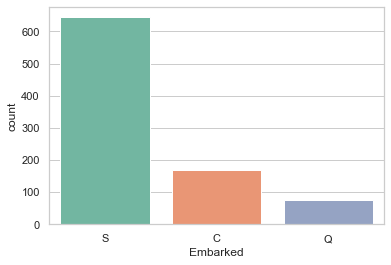

In [13]:
print("Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = South Hampton):")
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [14]:
print('The most common boarding port of embarkation is %s' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S


In [15]:
train_data = train_df.copy()

In [16]:
train_data['Age'].fillna(train_df['Age'].median(skipna = True), inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace = True)
train_data.drop('Cabin', axis=1, inplace=True)

In [17]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [19]:
train_data['TravelAlone'] = np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)

In [20]:
train_data.drop('SibSp', axis=1, inplace = True)
train_data.drop('Parch', axis=1, inplace = True)

In [21]:
training = pd.get_dummies(train_data, columns = ["Pclass", "Embarked", "Sex"])

In [22]:
training.head(5)

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [23]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

In [24]:
final_train = training
final_train.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
5,0,28.0,8.4583,1,0,0,1,0,1,0,1
6,0,54.0,51.8625,1,1,0,0,0,0,1,1
7,0,2.0,21.0750,0,0,0,1,0,0,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0


### Exploratory Data Analysis 

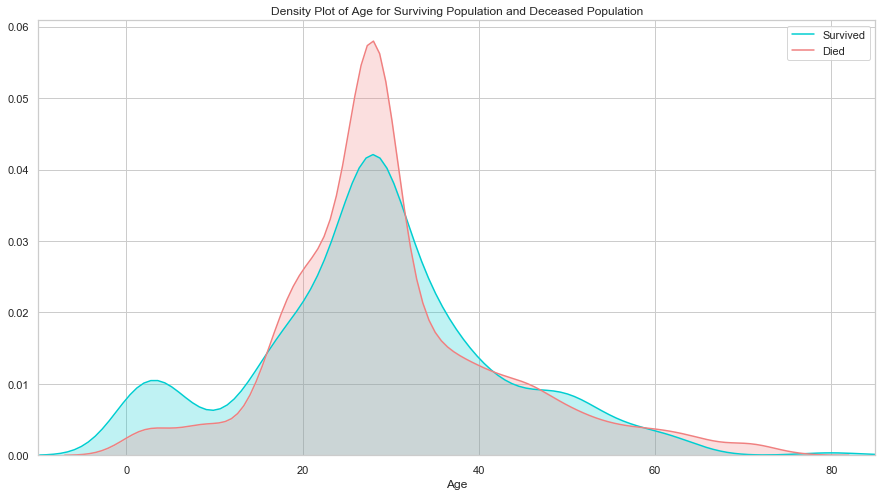

In [25]:
#Exploration by Age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color = "darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color = "lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10, 85)
plt.show()

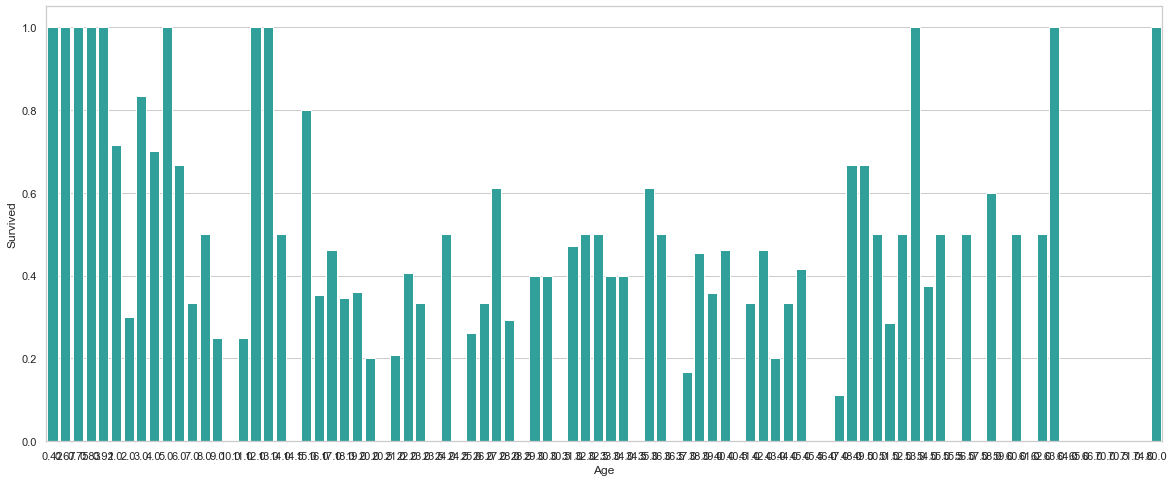

In [26]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index = False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color='LightSeaGreen')
plt.show()

In [27]:
#Categorical variable Minor is included in the dataset considering survival rate of passengers under 16
final_train['IsMinor'] = np.where(final_train['Age']<=16, 1,0)

In [28]:
final_train.head(10)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
5,0,28.0,8.4583,1,0,0,1,0,1,0,1,0
6,0,54.0,51.8625,1,1,0,0,0,0,1,1,0
7,0,2.0,21.0750,0,0,0,1,0,0,1,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0,1


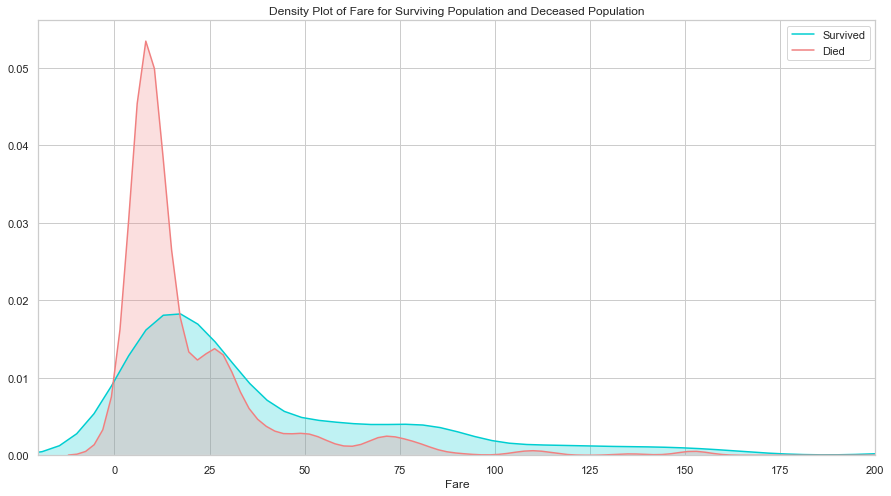

In [29]:
#Exploration By Fare
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color = "darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color = "lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20, 200)
plt.show()

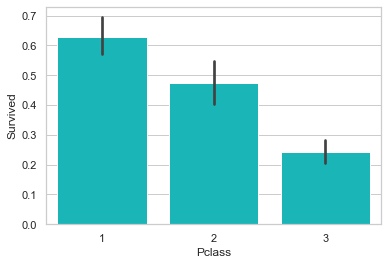

In [30]:
#Exploration by Passenger Class
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

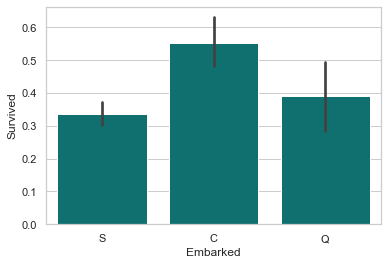

In [31]:
#Exploration of Embarked Plot
sns.barplot('Embarked', 'Survived', data=train_df, color='teal')
plt.show()

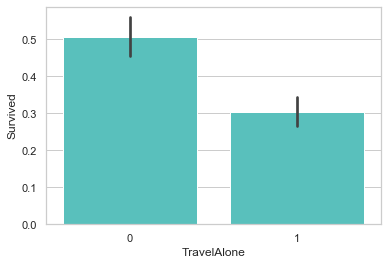

In [32]:
#Exploration of Travelling Alone vs With Family
sns.barplot('TravelAlone', 'Survived', data=final_train, color='mediumturquoise')
plt.show()

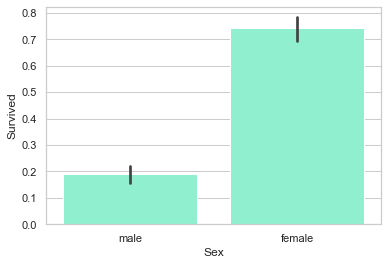

In [33]:
#Exploration of Gender Variable
sns.barplot('Sex', 'Survived', data= train_df, color='aquamarine')
plt.show()

### Logistic Regression and Results

In [34]:
#Feature Selection using Recursive Feature Elimination(RFE)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [35]:
final_train.columns

Index(['Survived', 'Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male',
       'IsMinor'],
      dtype='object')

In [36]:
cols = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']

In [37]:
X = final_train[cols]
y = final_train['Survived']

In [38]:
model = LogisticRegression()
rfe = RFE(model,8)

In [39]:
rfe.fit(X,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=8, step=1, verbose=0)

In [40]:
#Feature Ranking with RFE and Cross Validation
from sklearn.feature_selection import RFECV

In [41]:
rfecv = RFECV(estimator=model, cv=10, scoring='accuracy')

In [42]:
rfecv.fit(X,y)

RFECV(cv=10,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [43]:
print("Optimal Number of features: %d" %rfecv.n_features_)
print("Selected features: %s" %list(X.columns[rfecv.support_]))

Optimal Number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


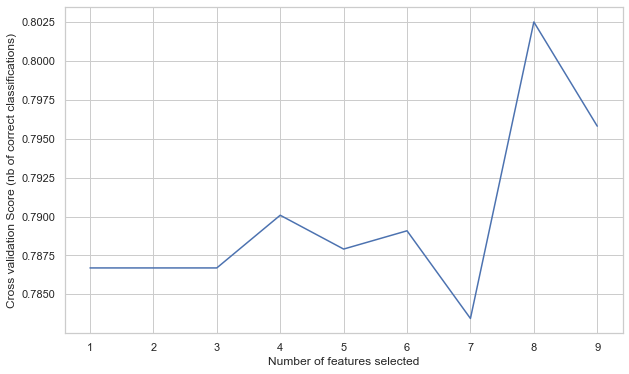

In [44]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

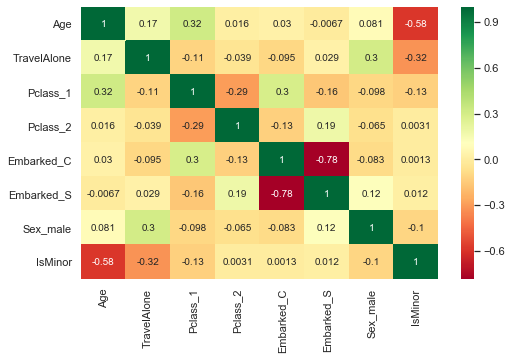

In [45]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]
plt.subplots(figsize = (8,5))
ax = sns.heatmap(X.corr(), annot = True, cmap = 'RdYlGn')
ax.set_ylim(8.0, 0.0)
plt.show()

### Model Evaluation based on simple train/test split using function

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [47]:
#Create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)

In [49]:
logreg = LogisticRegression()

In [50]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
y_pred_proba = logreg.predict_log_proba(X_test)[:,1]

In [53]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [54]:
print("Train/Test split results:")
print(logreg.__class__.__name__ + " accuracy is %2.3f" %accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__ + " log_loss is %2.3f" %log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__ + " auc is %2.3f" %auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 15.243
LogisticRegression auc is 0.839


In [55]:
idx = np.min(np.where(tpr>0.95))

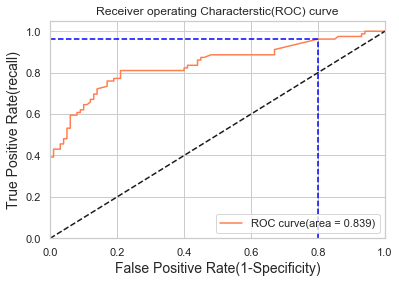

In [56]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve(area = %0.3f)' %auc(fpr, tpr))
plt.plot([0,1],[0,1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=14)
plt.ylabel('True Positive Rate(recall)', fontsize=14)
plt.title('Receiver operating Characterstic(ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [57]:
print("Using a threshold of %3f" %thr[idx] + " guarantees a sensitivity of %3f" %tpr[idx]+ " and a specificity of %3f" %(1-fpr[idx])+" ,i.e a false positive rate of %2f%%."%(np.array(fpr[idx])*100))

Using a threshold of -2.645904 guarantees a sensitivity of 0.962025 and a specificity of 0.200000 ,i.e a false positive rate of 80.000000%.


In [58]:
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index = range(0,2), columns=range(0,2))

,0,1
0,90,10
1,29,50
